<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/decision_tree_code(titanic_passenger_csv)2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-1058024f2989>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Age'].fillna(new_data['Age'].mean(), inplace=True)
<ipython-input-1-1058024f2989>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace({'Sex': {'male': 1, 'female': 0}}, inplace=True)
<ipython-in

Accuracy: 0.8212290502793296


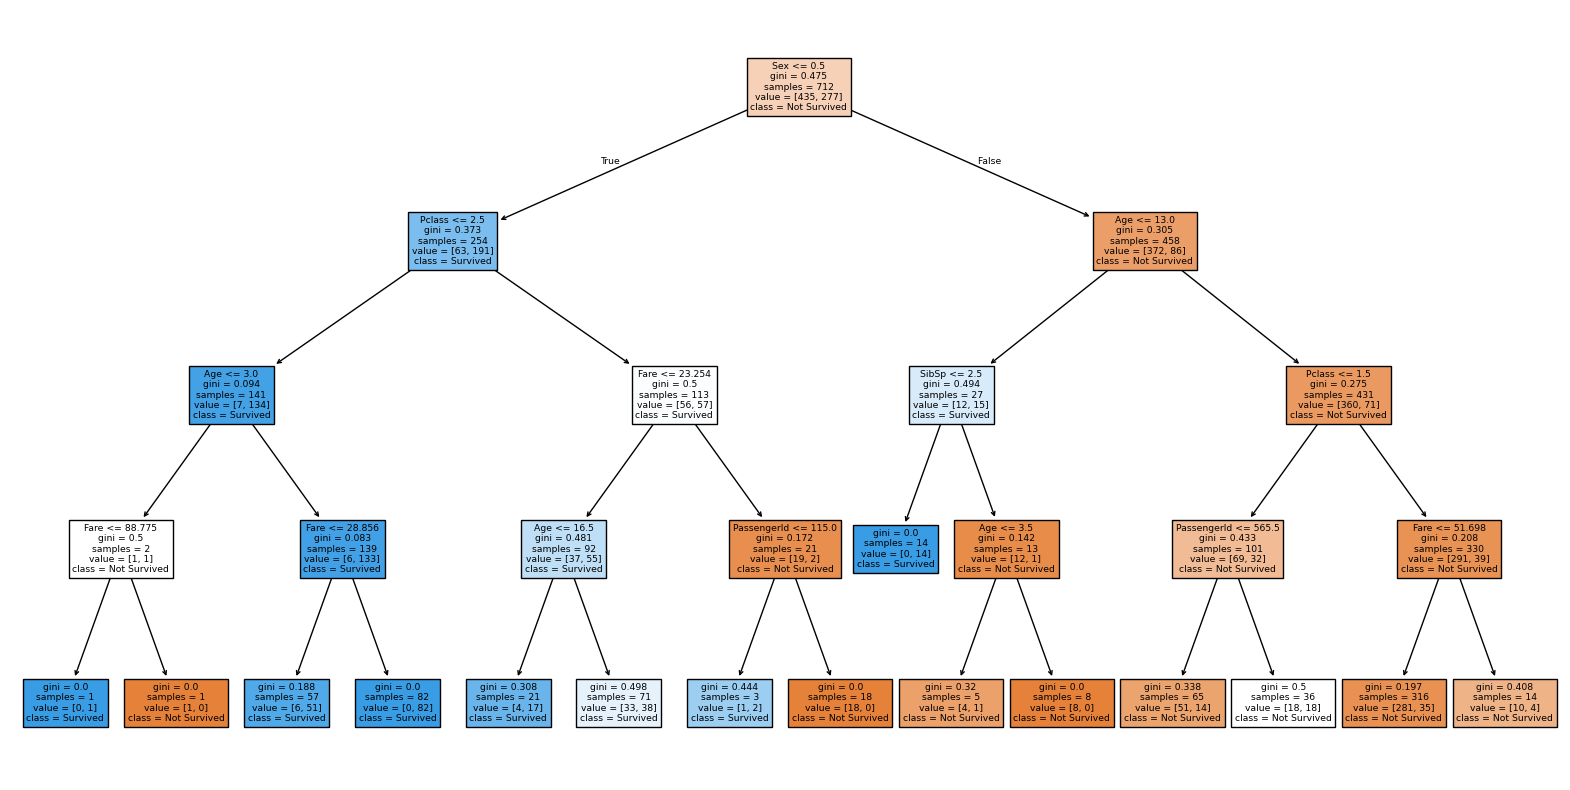

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the dataset
data = pd.read_csv('/content/titanic-passengers.csv', sep=';')

# 2. Preprocessing
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(), inplace=True)
    new_data.replace({'Sex': {'male': 1, 'female': 0}}, inplace=True)
    new_data['Cabin'] = new_data.Cabin.fillna('G6')
    new_data.replace({'Survived': {'Yes': 1, 'No': 0}}, inplace=True)
    return new_data

data = preprocess_data(data)

# 3. Feature selection
x = data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y = data["Survived"]

# 4. Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 5. Train model
tree_model = DecisionTreeClassifier(max_depth=4)  # limit depth to make it easier to visualize
tree_model.fit(x_train, y_train)

# 6. Evaluate model
y_pred = tree_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 7. Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=x.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()
